# <font color='Tomato'> <center> <u> Traffic Flow with PDEs </u></center></font>

### <font color='Tomato'> <center> ICFP M1 Numercial Physics Project 2017-2018 </center> </font>

#### <font color='navy'> <center> Authors: Rob Hesselink(rob.hesselink@ens.fr) and Moshir Harsh (moshir.harsh@ens.fr)</center></font>

### <font color='Tomato'> <u> Introduction </u></font>

Physical systems have been modeled using <b>partial differential equations (PDEs)</b> by physicists over centuries to enhance their understanding and to make predictions. Most physical quantities such as density, temperature or velocity are continuous functions of the variables at a mesoscopic or a larger length scale and PDEs accurately describe the solutions to these physical quantities.

Other quantities which occur discretely in nature like number of animals can also be approximated by continuous functions like population. They can be modelled by PDEs$^1$ in the limit of large numbers. <b>Difference Equations</b>, which are analogues of PDEs in the discrete domain, are strictly speaking a better description of these systems but modelling them by PDEs instead offer several advantages and ease of calculation. For a wide class of PDEs analytical solutions or general analytical results can be derived, which is not the case for difference equations. Difference equations also very frequently run into the domain of chaos$^2$, even in 1D, and the solutions no longer are well behaved. For PDEs, chaos is not observed in at least 2 dimensions and solutions are better behaved. For most cases in the limit of large numbers, the solutions offered by PDEs are close to those obtained from difference equations. This strategy has been fairly successful, especially in the fields of population ecology and modelling traffic$^{1,4}$.

After the 1950s, due to a rapid increase in the number of personal vehicles, the freeways and roads experienced major traffic jams and delays in transportation cost billions$^4$. From then on it became important to understand the nature of traffic jams, how they arise and disperse, and what could be done to avoid them. <b>Mathematical modeling of traffic jams</b> was the approach the physicists took to understand this problem and has since resulted in numerous publications and insights in understanding traffic flow$^5$.

The equations describing traffic flow are <b>non-linear</b> and the solutions of which can show surprising features such as discontinuities called <b>shocks</b>. The analytical solutions to these equations are rare and generally numerical methods have to be carefully used to obtain any solutions. The solutions to these equations are not only interesting from their application point of view but also to the numerical physics community, for these equations present an opportunity to learn more about non-linearity and how the numerical schemes can be improved.

### <font color='Tomato'> <u> Mathematical Models and Lighthill–Whitham–Richards (LWR) Equation </u></font>

Traffic models can be studies in analogy with with <b>fluid flow models</b>. Cars can be coarse grained and modelled as a fluid described by a </b>density field $\rho(\vec{x})$</b> and with a <b>velocity field $u(\vec{x})$</b> which corresponds to the literal density of cars at $\vec{x}$ and the velocity of cars at $\vec{x}$. Our objective is to determine $\rho(t,\vec{x})$ and $u(t,\vec{x})$ given appropriate boundary conditions. These quantities can be obtained as the solution to a PDE which relates the time and space evolution of density and velocity under the appropriate physical law governing the traffic flow.

To understand traffic flow, we make an assumption on the velocity u as a function of the density $\rho$. Physically at low densities, the cars will go at high velocities with $v_0$ being the maximum velocity, but if the density of cars get high, the velocity of cars will decrease linearly due to congestion, becoming 0 at $\rho = \rho_0$. Here we study 1-dimensional traffic flow. This was the key assumption of the <b>Lighthill–Whitham–Richards (LWR) model</b>. The velocity in the LWR model is defined as:

\begin{equation}
    u = v_0\left(1-\frac{\rho}{\rho_0}\right)
\end{equation}

For our treatment we consider a <b>circular road with no input nor output flux of cars</b>. Then, trivially the <b>number of cars should be conserved in time</b>. Thus, the <b>continuity equation for an incompressible fluid</b>, which says that the change in the number of cars in a small volume in a small time must be equal to the difference of the flux of cars coming in and going out in the small volume in that time, must describe the time evolution of density: 

\begin{equation}
    \frac{\partial \rho}{\partial t} + \frac{\partial (\rho u)}{\partial x} = 0
\end{equation}

Combining these two we get:

\begin{equation}
 \frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}\left[ v_0 \left(1-\frac{\rho}{\rho_0}\right)\rho \right] = 0 
\end{equation}

where <b>$v_0$ and $\rho_0$ are the parameters which are set to one</b> without loss of generality. So the equation becomes:

\begin{equation}
    \frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}\left[ \left(1-\rho\right)\rho \right] = 0
\end{equation}

This equation can also be written as:

\begin{equation}
    \frac{\partial \rho}{\partial t} + \left(1-2\rho\right)\frac{\partial \rho}{\partial x} = 0
\end{equation}

This is the simplest <b>Lighthill–Whitham–Richards LWR model</b>. This equation is also known as the <b>inviscid Burgers' equation</b> which form huge discontinuities commonly referred to as <b>shock</b>.

The LWR equation was developed in 1955 and 1956 by Lighthill and Whitham, and independently also by Richards$^6$. In addition to the continuity equation, their key assumption was that the traffic flow $Q(x,t) = \rho(x,t)u(x,t)$, or speed $u(x,t) = u(\rho(x,t))$ is always in local equilibrium with respect to the density: <b>Traffic flow and local speed instantaneously follow the density, not only for steady-state traffic but in all situations$^4$</b>.

The exact form of $u(\rho(x,t))$ was not defined originally and is obtained by experimental fitting the data or by simple assumptions like the linear decrease of velocity with density, which we have used for our analysis.

#### <font color='Tomato'> <u> Advection Equation </u></font>

The Burgers' equation belong to a much bigger class of <b>Advection Equations</b> which are <b>hyperbolic partial differential equations</b> and are notorious for numerical schemes to handle due to shocks.

An advection equation arrises when a scalar field (here being density) is advected (transported by bulk motion) by a vector field (here being the velocity). Related quantities like Energy are also advected with the scalar field. The LWR equation is more complex than a simple advection equation because unlike the Advection equation where the velocity is constant, the velocity here depends on the density.

### <font color='Tomato'> <u> Burgers' Equation and Shocks </u></font>

In Burgers' equation the propagation velocity decreases with density, this results in highly dense and slowly moving regions, and rare and highly mobile regions which propagate as a shock wave. Suppose we start from a sin modulation of density, the low density areas where sin is minimum will move faster towards the high density areas, and the high density areas where sin is maximum will move slowly. As a result the wave will get distorted because mass from low density areas moves faster and accumulates while the high density areas cannot disperse their mass.

This results in steep gradient or a discontinuity in $\rho$, which propagates at a velocity, called a shock wave as shown in the figure. The numerical treatment of shocks is difficult due to the increasing discontinuity and methods fail as the gradient grows. Traditional schemes like Finite Elements and Finite Volumes don't work well and have to replaced by the Gudonov method to obtain correct solutions up until shock formation. Once the shock has formed, many numerical schemes no longer perform well. 

![Image of Shock](http://laurent.nack.pagesperso-orange.fr/burgers/graph1.gif)
Image from http://laurent.nack.pagesperso-orange.fr/burgers/burger.htm

The shock propagates with a constant velocity which can be obtained by simple analysis$^4$:

\begin{equation}
    c_{12} = \frac{dX_{12}}{dt} = v_0 \left[ 1-\left( \frac{\rho_1+\rho_2}{\rho_0} \right)\right]     
\end{equation}

where $\rho_1$ and $\rho_2$ are the densities at the two sides of the shock wave and $v_0$ and $\rho_0$ were defined earlier.

<img src="shock_front.png" width="480">
Shockfront velocity. Image from$^3$.
 
### <font color='Tomato'> <u> Numerically Solving the LWR Equation </u></font>

The LWR Equation in the last form is solved on a <b>1D space on an x-grid</b> that goes from 0 to 1 with <b>periodic boundary conditions</b> which amounts to solving traffic flow on a <b>circular road</b> with neither exits nor entrances:

\begin{equation}
    \rho(x+1) = \rho(x)
\end{equation}

Subjected to the initial conditions:

\begin{equation}
    \rho(t=0,x) = 0.2 + 0.1sin(2\pi x)
\end{equation}

Which assumes a constant density of cars at $\rho=0.2$ over which we have a sin modulation of density of amplitude 0.1. The density $\rho>0$ $\forall$ x and stays that way $\forall$ t. NOTE: Negative density of cars is unphysical.

The total <b>integration time, T = 1</b> with the <b>number of grid points = N</b>, the time increment <b>$\Delta t=\frac{1}{N}=\frac{1}{100} $</b> and spatial increment, <b>$\Delta x=\frac{1}{N}=\frac{1}{100}$</b>.

Since we consider a 1D circular road with no output or input flux of cars, the <b>total number of cars on the road = M, should stay constant in time</b>:

\begin{equation}
    M(t) = \int_{0}^{1} \rho(t,x)dx = \sum_{i=0}^{1} \rho{t,x_i} 
\end{equation}

Evaluating M(t) is one way to check the accuracy of our numerical schemes. Schemes such as finite element are dispersive or dissipative and usually do not conserve M, and that's why we have to use either finite volume schemes which are conservative in nature.

### <font color='Tomato'> <u> CFL Condition </u></font>

The Courant-Friedrichs-Lewy condition is a condition for the convergence of numerical methods for partial differential equations. It states: $\textit{the numerical domain of dependence must include the physical domain of dependence}^7$. The analytical domain of dependence for the WLR equation is $c\Delta t$: the distance a wave can travel during time step $\Delta t$. The numerical domain of dependence is $\Delta x$, since in all schemes used here, interaction happens with nearest neighbours. This results in the CFL condition of

\begin{equation}
    (1-2\rho) \frac{\Delta t}{\Delta x} \leq 1.
\end{equation}

If the condition is violated, information is lost in the simulation that is contained in the original WLR equation. This loss of information impedes convergence and often destabilizes the scheme. 


### <font color='Tomato'> <u> Overview </u></font>

We simulate the solution to this equation using different schemes and compare our results:
<ol>
    <li> <b>Finite Element Schemes </b>
        <ol>
            <li> Lax-Wendroff
            <li> Lax-Friedrichs
        </ol>
    <li> <b>Finite Volume Schemes </b>
        <ol>
            <li> Lax-Wendroff
            <li> Lax-Friedrichs
        </ol>
    <li> <b>Gudonov Method</b>
    <li> <b>Lagrange Method</b>
</ol>

We also discuss the <b>dispersive and/or the dissipative nature</b> of these schemes, their <b>stability</b> also demonstrate the <b>modified wavenumber</b> analysis for one of the cases. We also calculate the <b>truncation error</b> for most of the schemes and calculate the <b>order of accuracy</b>. We finish by presenting some results on the <b>dependence of the error on the grid size</b> in time and space.

### <font color='Tomato'> <u> References </u></font>

<i>
[1] Holmes, E. E., Lewis, M. A., Banks, J. E. and Veit, R. R. (1994), Partial Differential Equations in Ecology: Spatial Interactions and Population Dynamics. Ecology, 75: 17–29. doi:10.2307/1939378

[2] May, R. M. (1976). Simple mathematical models with very complicated dynamics. Nature, 261, 459. Retrieved from http://dx.doi.org/10.1038/261459a0

[3] Godunov, S. K. (n.d.). Finite Difference Method for Numerical Computation of Discontinuous Solutions of the Equations of Fluid Dynamics.

[4] Treiber, M., and Kesting, A. (2013). Traffic Flow Dynamics. Traffic Flow Dynamics. http://doi.org/10.1007/978-3-642-32460-4

[5] Helbing, D. (2001). Traffic and related self-driven many-particle systems. Reviews of Modern Physics, 73(4), 1067–1141. http://doi.org/10.1103/RevModPhys.73.1067

[6] M.J.Lighthill, G.B.Whitham, On kinematic waves II: A theory of traffic flow on long, crowded roads. Proceedings of the Royal Society of London Series A 229, 317-345, 1955

[7] Laney, C. B. (1998). Computational gasdynamics. Cambridge university press.

[8] Godunov, S. K. (1959). A difference method for numerical calculation of discontinuous solutions of the equations of hydrodynamics. Matematicheskii Sbornik, 89(3), 271-306.

[9] Toro, E. F. (2013). Riemann solvers and numerical methods for fluid dynamics: a practical introduction. Springer Science & Business Media. 

</i>

In [1]:
# UNIVERSAL (ALWAYS RUN FIRST)

#Importing Packages
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

#Parameters:
N = 100.
dx = 1/N
dt = 1/N
T = 1.
v0 = 1
rho0 = 1
L_factor = 100 #Factor for the Langrangian solution.

#defining grid.
x0 = np.arange(0, 1, dx)
xL0 = np.arange(0,1, dx/L_factor)

#Initial Conditions: Here we define various initial 
#conditions, only uncomment the one to be used.

#Sin Wave
p0 =  0.2 + 0.1*np.sin(np.arange(0, 2*np.pi, 2*np.pi*dx))
pL = 0.2 + 0.1*np.sin(np.arange(0, 2*np.pi, 2*np.pi*dx/L_factor))


#Block
#p0 = 0.2*np.ones(int(N))
#p0[20:30] = 0.4
#pL = 0.2*np.ones(int(N)*L_factor)
#pL[20*L_factor:30*L_factor] = 0.4

#Gauss
#def Gauss(x):
#    return .2*np.exp(-(x - .4)**2/.03)
#p0 = .2 + Gauss(x0)
#pL = .2 + Gauss(xL0)



class variable():
    """Class to allow variables to be used and reset afterwards"""
    def __init__(self, value):        
        self.backup = np.copy(value)
        self.v = np.copy(value)
    
    def update(self, function):
        if function.str == "Lagrange":
            self.v = function(self.v, pL)
        else:
            self.v = function(self.v)
        return self.v

    def reset(self):
        self.v = np.copy(self.backup)

#Creating global variables.
p = variable(p0)
xL = variable(xL0)

def reset(variables = [p,xL]):
    """Resets variables to their original values"""
    for variable in variables:
        variable.reset()
    return 0

# Helper functions
def flux(shift, p):    
    """ Helper function for conservative schemes. """
    if shift == 0:
        return v0*(1 - p/rho0)*p
    else:
        return v0*(1 - np.roll(p, -shift)/rho0)*np.roll(p, -shift)

def velocity(shift = 0, array=p):
    """ Helper function for Godunov scheme. """
    if shift == 0:
        return v0*(1 - array/rho0)
    else:
        return v0*(1 - np.roll(array, -shift)/rho0)
    
    
def animate(i, scheme, line, mass, time):
    """Animation function. Runs the schemes."""
    
    #Runs the schemes and sets data to lines.
    if scheme.str == "Lagrange":
        xL.update(scheme)
        line.set_data(xL.v, pL)
    else:
        p.update(scheme)
        line.set_data(x0, p.v)
    
    #Adds time and total mass to the plots.
    time.set_text("T = " + "%.2f" % (i*dt)) 
    mass.set_text("M = " + "%.2f" % (np.sum(p.v)))
    return line, time, mass
    
def run(scheme):
    """ Helper function to run and animate different schemes. """  
    #Set up figure.
    fig, ax = plt.subplots(figsize=(8, 4))

    ax.set_xlim((0, 1))
    ax.set_ylim((0, .5))
    line, = ax.plot([], [], lw=2)
    ax.set_ylabel(r'$\rho$')
    ax.set_xlabel("x")
    time = ax.annotate("", xy=(.75, .45))
    mass = ax.annotate("", xy=(.75, .42))
    
    if scheme.str == "Lagrange":
        line.set_linestyle('none')
        line.set_marker('o')
        line.set_markersize(.06)
    
    #Plot initial condition for reference.
    ax.plot(x0, p0, "--")
    
    #Run animation.
    ax.set_title(scheme.str)
    anim = animation.FuncAnimation(fig, animate, fargs=(scheme, line, mass, time),
                               frames=int(T/dt), interval=50, blit=True)
    rc('animation', html='html5')
    
    #Close figure and reset before returning.
    plt.close(anim._fig)
    reset()
    return HTML(anim.to_html5_video())


## <font color='navy'>Finite Element Methods </font>

### <font color='navy'> Lax-Friedrichs  $\mathcal{O}(\Delta t, \frac{\Delta x^2}{\Delta t})$ </font>

\begin{equation}
    u_x^{t+1} = \frac{u_{x+1}^t + u_{x-1}^t}{2} - (1 - 2u)\frac{\Delta t}{2 \Delta x}(u_{x+1}^t - u_{x-1}^t)
\end{equation}

In [2]:
def LF(p):
    """ Finite elements Lax-Friedrichs scheme. """  
    A = (np.roll(p, -1) + np.roll(p, 1))/2.
    B = -dt*(1 - 2*p)*(np.roll(p, -1) - np.roll(p, 1))/(2*dx)
    return (A + B)

LF.str = "Lax-Friedrichs"
run(LF)

##### <font color='navy'> Explanation: <font>
The Lax-Friedrichs scheme is created through a small alteration to the $\delta_0$ scheme. By replacing $u_x^t$ with the average of the two neighbouring cells, the instability can be avoided and the scheme becomes conditionally stable. The Lax-Friedrichs scheme for the WLR equation is:
\begin{equation}
    u_x^{t+1} = \frac{u_{x+1}^t + u_{x-1}^t}{2} - (1 - 2u)\frac{\Delta t}{2 \Delta x}(u_{x+1}^t - u_{x-1}^t)
\end{equation}

The condition for stability can be determined by the Von Neumann analysis below. 
\begin{align}
    \xi &= \frac{e^{ik\Delta x} + e^{-ik\Delta x}}{2} - (1 - 2u)\frac{\Delta t}{2 \Delta x} \left(e^{ik\Delta x} - e^{ik\Delta x}\right) \\
    &= \cos{k\Delta x} - \frac{\Delta t}{\Delta x}(1 - 2u) i \sin{k \Delta x}.
 \end{align}
 To find our stability condition, we need to find the amplification factor
 \begin{align}
     |\xi|^2 &= \cos^2{k\Delta x} + r^2 \sin^2{k\Delta x} \\ 
             &= 1 - (1 - r^2)\sin^2{k\Delta x},
 \end{align}
 where $ r \equiv \frac{\Delta t}{\Delta x}(1 - 2u) $. This shows that the scheme is stable as long as $ r \leq 1 $. The newfound stability comes at a cost, as the Lax-Friedrichs scheme introduces second-order numerical dissipation to the equation. The average of neighbours on the RHS can be expanded as
 
 \begin{align}
     \frac{u_{x+1}^t + u_{x-1}^t}{2} &= u_x^t + \frac{\Delta x^2}{2}\frac{\partial^2 u}{\partial x^2} + \mathcal{O}(x^4),
 \end{align}
and the numerical dissipation is identified as the second order derivative. 

##### <font color='navy'> Accuracy: <font>
\begin{equation}
R_h = \frac{\Delta t}{2}\frac{\partial^2 u}{\partial t^2} + \frac{\Delta x^2}{6}\frac{\partial^3 u}{\partial x^3} + \frac{\Delta x^2}{2\Delta t}\frac{\partial^2 u}{\partial x^2} + \mathcal{O}(\Delta t^2, \Delta x^4)
\end{equation}


### <font color='navy'> Lax-Wendroff  $\mathcal{O}(\Delta t^2, \Delta x^2)$ <font>

 \begin{align}
    u_x^{t+1} = u_x^t - \frac{\Delta t}{2 \Delta x}(u_{x+1}^t - u_{x-1}^t) + (1-2u)^2\frac{\Delta t^2}{2 \Delta x^2} (u_{x+1}^t - 2u_x^t + u_{x-1}^t). 
 \end{align}

In [3]:
def LW(p):
    """ Finite elements Lax-Wendroff scheme. """
    A = -(1 - 2*p)*(np.roll(p, -1) - np.roll(p, 1))/(2*dx)
    B = dt/2*(1 - 2*p)**2*(np.roll(p, -1) - 2*p + np.roll(p, 1))/(dx*dx)
    p += dt*(A + B)
    return p

LW.str = "Lax-Wendroff"
run(LW)

##### <font color='navy'> Explanation: </font>
The Lax-Wendroff scheme is created by compensating explicitly for the dissipation in the $\delta_0$ scheme. If we look at the truncation of both sides of $\delta_0$, we can discover the dissipation term.

\begin{align}
    \frac{u_x^{t+1} - u_x^t}{\Delta t} &= \frac{\partial u}{\partial t} + \frac{\Delta t}{2}\frac{\partial^2 u}{\partial t^2} + \frac{\Delta t^2}{6} \frac{\partial^3 u}{\partial t^3} + \mathcal{O}(\Delta t^3)  \text{, and} \\
    \frac{u_{x+1}^t - u_{x-1}^t}{2\Delta x} &= \frac{\partial u}{\partial x} + \frac{\Delta x^2}{6}\frac{\partial^3 u}{\partial x^3} +  \mathcal{O}(\Delta x^4).
\end{align}
The dissipation term is first-order and can be rewritten by using the WLR equation to read:
\begin{align}
    \frac{\Delta t}{2}\frac{\partial^2 u}{\partial t^2} &= -(1-2u)^2\frac{\Delta t}{2}\frac{\partial^2 u}{\partial x^2} \\
    &= -(1-2u)^2\frac{\Delta t^2}{2 \Delta x^2} (u_{x+1}^t - 2u_x^t + u_{x-1}^t) + \mathcal{O}(\Delta x^2).
\end{align}
 
 By subtracting this term from the $\delta_0$ scheme, we are left with a dissipation-free second order scheme:
 \begin{align}
    u_x^{t+1} = u_x^t - \frac{\Delta t}{2 \Delta x}(u_{x+1}^t - u_{x-1}^t) + (1-2u)^2\frac{\Delta t^2}{2 \Delta x^2} (u_{x+1}^t - 2u_x^t + u_{x-1}^t). 
 \end{align}
 But alas, this scheme is still not perfect. As evidenced by the earlier identities for the truncation error, the leading-order truncation is now a dispersive term. Since the shockwave is nearly discontinuous, it requires a lot of fourier modes to be accurately represented. This is why the biggest discrepancy between the Lax-Wendroff solution and the other solutions is found around the shock wave. 
 
##### <font color='navy'> Accuracy: </font>
\begin{equation}
R_h = \frac{\Delta t^2}{6} \frac{\partial^3 u}{\partial t^3} + \frac{\Delta x^2}{6}\frac{\partial^3 u}{\partial x^3} + \frac{\Delta x^2}{12}\frac{\partial^4 u}{\partial x^4} + \mathcal{O}(\Delta t^3, \Delta x^4)
\end{equation}

 

##### <font color='navy'>Modified Wavenumber:</font>
Another way to analyse the dispersive term is by looking at the modified wavenumber. Due to the discrete nature of the grid, waves consisting of high wavenumber $k$ (and therefore short wavelength) will be poorly sampled. This introduces a modified wavenumber $k'$. The expression for the modified wavenumber can be found by treating a Fourier mode $f = e^{ikx}$ with the scheme in question. For the Lax-Wendroff scheme 


\begin{equation}
    (1-2u)\frac{\partial u}{\partial x} \approx (1-2u)\frac{1}{2 \Delta x} (u_{x+1}^t - u_{x-1}^t) - (1-2u)^2\frac{\Delta t}{2 \Delta x^2} (u_{x+1}^t - 2u_x^t + u_{x-1}^t),
\end{equation}

this results in:
\begin{align}
    ik'f &=  \frac{1}{2 \Delta x}\left( e^{ik(x + \Delta x)} - e^{ik(x - \Delta x)}\right) - (1-2u)\frac{\Delta t}{2 \Delta x^2}\left(e^{ik(x + \Delta x)} -2e^{ikx} + e^{ik(x - \Delta x)}\right) \\
    ik' & = i\frac{\sin(k\Delta x)}{\Delta x} - \Delta t(1-2u)\frac{\cos(k\Delta x) - 2}{2 \Delta x} \\
    \frac{k'}{k}    &= \text{sinc}(k\Delta x) + 2i\Delta t(1-2u)\frac{\sin^2\left(\frac{k\Delta x}{2}\right)}{k\Delta x^2}.
\end{align}

Compared to the modified wavenumber for the $\delta_0$ scheme, which gives

\begin{equation}
    \frac{k'}{k} = \text{sinc}(k\Delta x),
\end{equation}

the effect on wavenumber of Lax-Wendroff is much larger. See below for a comparison.




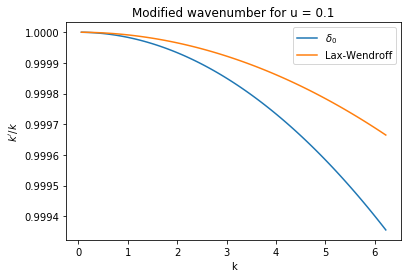

In [4]:
def k_d0(k):
    """Calculates k change for delta zero scheme"""
    return np.sin(k*dx)/(k*dx)

def k_LW(k):
    """Calculates k change for Lax-Wendroff scheme"""
    return np.abs(k_d0(k) + 2j*dt*(1-2*u)*np.sin(k*dx/2.)**2/(k*dx*dx))
#Local density of cars. 
u = .1

dk = 2*np.pi/N
k = np.arange(dk, 2*np.pi, dk)

plt.plot(k, k_d0(k), label=r'$\delta_0$')
plt.plot(k, k_LW(k), label="Lax-Wendroff")
plt.xlabel("k")
plt.ylabel(r'$k^\prime/k$')
plt.title("Modified wavenumber for u = " + str(u))
plt.legend()
plt.show()

## <font color='navy'> Finite Volume Methods </font>

Finite volumes scheme approach a problem by creating small cell within the domain and taking the average value of $u$ within that section. Changes in the system are then calculated by calculating the flux at the boundary of the cell. The advantage is that finite volumes schemes are inherently conservative. For the burger's equation, the flux can be identified in the continuity form of the WLR equation where, in discrete notation, $f_x^t = v_0 \left(1-\frac{\rho_x^t}{\rho_0}\right)\rho_x^t$. All finite volume methods use 

\begin{align}
    u_x^{t+1} = u_x^t -\frac{\Delta t}{\Delta x}\left(f_{x+\frac{1}{2}}^{t+\frac{1}{2}} - f_{x-\frac{1}{2}}^{t+\frac{1}{2}}\right),
\end{align}

and the difference lies in correctly identifying the flux at the boundaries. 


### <font color='navy'> Lax-Friedrichs $\mathcal{O}(\Delta t, \Delta x)$ </font>

\begin{align}
    f_{x+\frac{1}{2}}^{t+\frac{1}{2}} = \frac{1}{2}(f_{x+1}^t + f_x^t) - \frac{\Delta x}{2\Delta t}(u_{x+1}^t - u_x^t), 
\end{align}

In [5]:
def LF_cons(p):
    """ Lax-Friedrichs conservative scheme. """
    f_left = 0.5*(flux(-1, p) + flux(0, p)) - dt/(2*dx)*(p - np.roll(p, 1))
    f_right = 0.5*(flux(0, p) + flux(1, p)) - dt/(2*dx)*(np.roll(p, -1) - p)

    p += -dt/dx*(f_right - f_left)
    return p

LF_cons.str = "Lax-Friedrichs conservative"
run(LF_cons)

##### <font color='navy'>Explanation: </font>
The finite volumes version of the Lax-Friedrichs scheme is similar to its finite differences cousin. It replaces the $u_x^t$ by the average of neighbours, but does so implicitly by defining the flux at the boundary as
\begin{align}
    f_{x+\frac{1}{2}}^{t+\frac{1}{2}} = \frac{1}{2}(f_{x+1}^t + f_x^t) - \frac{\Delta x}{2\Delta t}(u_{x+1}^t - u_x^t), 
\end{align}
which results in a final scheme of 
\begin{align}
    u_x^{t+1} = \frac{u_{x+1}^t + u_{x-1}^t}{2} -\frac{\Delta t}{2\Delta x}\left(f_{x+1}^{t} - f_{x-1}^{t}\right).
\end{align}
Its stability and introduction of dissipation are the same as the finite differences version, given a sufficiently smooth solution. 

It is good to note that the only difference between the previous version is $(1-2u_x^t)$ by the appropriate neighbouring $( 1-2u_{x \pm 1}^t)$. The above flux term can then be expanded to read

\begin{align}
    \frac{\Delta t}{2\Delta x}\left(f_{x+1}^{t} - f_{x-1}^{t}\right) &= \frac{\Delta t}{2\Delta x}\left[(1-2u_x^t)(u_{x+1}^t - u_{x-1}^t) - 2\Delta x\frac{\partial u}{\partial x}(u_{x+1}^t - u_{x-1}^t) + \right] + \mathcal{O}(\Delta x^3) \\
    &= \frac{\Delta t}{2\Delta x}\left[(1-2u_x^t)(u_{x+1}^t - u_{x-1}^t) - \left(2\Delta x \frac{\partial u}{\partial x}\right)^2   \right] + \mathcal{O}(\Delta x^3) \\
    &= \frac{\Delta t}{2\Delta x}(1-2u_x^t)(u_{x+1}^t - u_{x-1}^t) - 2\Delta x\Delta t\left(\frac{\partial u}{\partial x}\right)^2 + \mathcal{O}(\Delta x^3).
\end{align}

One can see that the conservative form adds, among others, a $2\Delta t\Delta x$ term to the previous Lax-Friedrichs equation. 

##### <font color='navy'>Accuracy: </font>

\begin{equation}
R_h = \frac{\Delta t}{2}\frac{\partial^2 u}{\partial t^2} + \frac{\Delta x^2}{6}\frac{\partial^3 u}{\partial x^3} + \frac{\Delta x^2}{2\Delta t}\frac{\partial^2 u}{\partial x^2} + 2\Delta x\Delta t\left(\frac{\partial u}{\partial x}\right)^2 + \mathcal{O}(\Delta t^2, \Delta x^3)
\end{equation}



### <font color='navy'>Lax-Wendroff  $\mathcal{O}(\Delta t^2, \Delta x^2)$</font>

\begin{align}
    u_{x+\frac{1}{2}}^{t+\frac{1}{2}} = \frac{u_{x+1} + u_{x-1}^t}{2} - \frac{\Delta t}{2\Delta x}\left(f_{x+1}^t - f_{x}^t\right)
\end{align}

In [6]:
def LW_cons(p):    
    """ Lax-Wendroff conservative scheme. """
    u_right = 0.5*(np.roll(p, -1) + p) - dt/(2*dx)*(flux(1, p) - flux(0, p))
    u_left  = 0.5*(p + np.roll(p, 1))  - dt/(2*dx)*(flux(0, p) - flux(-1, p))

    f_right = flux(0, u_right)
    f_left = flux(0, u_left)
    
    p += -dt/dx*(f_right - f_left)
    return p

LW_cons.str = "Lax-Wendroff conservative"
run(LW_cons)

##### <font color='navy'>Explanation: </font>
This scheme again compensates for the dissipation of the simple centered scheme. By defining

\begin{align}
    u_{x+\frac{1}{2}}^{t+\frac{1}{2}} = \frac{u_{x+1} + u_{x-1}^t}{2} - \frac{\Delta t}{2\Delta x}(f_{x+1}^t - f_x^t), 
\end{align}
the added flux term on the right corresponds to the second derivative as seen in the finite differences version.

##### <font color='navy'>Accuracy:</font>
While we could not fully calculate the truncation error for the Lax-Wendroff conservative scheme, the conservative scheme is still second order accurate. 



## <font color='navy'> Gudonov Method $\mathcal{O}(\Delta t, \Delta x)$ </font>

In [7]:
def Godunov(p):
    """ Godunov scheme """
    vl = velocity(0, p)
    vr = velocity(1, p)
    ul = p
    ur = np.roll(p, -1)

    #Shock or rarefaction?
    Shock = vl - vr > 0 # 1 is shock, 0 = rarefaction.
    Rare = Shock != 1

    #Direction of shock. 
    Sl = (vl + vr)/2. < 0
    Sr = Sl != 1

    #Sign of velocity.
    v_right = (vl >= 0) == (vr > 0)
    v_left = (vr <= 0) == (vl > 0)
    
    # Adding shock.
    u  = Shock*Sl*ur   
    u += Shock*Sr*ul

    #Adding rarefaction.
    u += Rare*v_right*ul
    u += Rare*v_left*ur

    f_right = flux(0, u)
    f_left  = flux(-1, u)

    p += -dt/dx*(f_right - f_left)
    return p

Godunov.str = "Godunov Method"
run(Godunov)

##### <font color='navy'>Explanation:</font>
The Godunov method follows the earlier conservative schemes by using 
\begin{align}
    u_x^{t+1} = u_x^t -\frac{\Delta t}{\Delta x}\left(f_{x+\frac{1}{2}}^{t+\frac{1}{2}} - f_{x-\frac{1}{2}}^{t+\frac{1}{2}}\right)
\end{align}
to update its values in time and is therefore also conservative. Again, the trouble is finding the value of the flux at the border of the cell $f_{x+\frac{1}{2}}^{t+\frac{1}{2}}$. 

The Godunov method views the boundaries between adjacent cells as Riemann problems. Our discrete grid gives us a piecewise constant function, with discontinuities at the boundaries, which can be stated as follows:

\begin{equation}
    u(x, 0)=
    \begin{cases}
      u_l, & \text{if}\ x<0 \\
      u_r, & \text{if}\ x>0
    \end{cases}
 \end{equation}
 
 By solving the above Riemann problem, the halfway value $u(0)$ can be found. The derivation of the Godunov scheme is a bit too broad for the scope of this work, but can be found in Godunov's 1959 paper$^8$. Concretely, solving the Riemann problem comes down to the case of shock ($u_l > u_r$) and rarefaction ($u_l \leq u_r$). In case of shock:

\begin{align}
    \text{Shock speed } S \equiv \frac{u_l + u_r}{2}\\
    u(0)=
    \begin{cases}
      u_l, & \text{if}\ S > 0 \\
      u_r, & \text{if}\ S < 0
    \end{cases}
 \end{align}

In case of rarefaction:
\begin{align}
    u(0)=
    \begin{cases}
      u_l, & \text{if}\ 0 \leq u_l \\
      0,   & \text{if}\ u_l < 0 < u_r \\
      u_r, & \text{if}\ u_r \leq 0
    \end{cases}
 \end{align}

##### <font color='navy'>Accuracy:</font>
The above Godunov method obeys the Godunov theorem. The Godunov theorem states that monotone schemes can at most be first order accurate. The derivation of this result is beyond the scope of this work. A consequence of this theorem, as expressed by remark 13.5.2 in Toro 2013$^9$ , is that second order methods produce oscillations near discontinuities. To verify this, an initial condition of a block has been provided. These oscillations can be clearly seen in other schemes, yet are absent in the Godunov solution.  

<i> [8] Godunov, S. K. (1959). A difference method for numerical calculation of discontinuous solutions of the equations of hydrodynamics. Matematicheskii Sbornik, 89(3), 271-306.

[9] Toro, E. F. (2013). Riemann solvers and numerical methods for fluid dynamics: a practical introduction. Springer Science & Business Media. 
 
 </i>



## <font color='navy'>An exact numerical solution by the Lagrange method </font>

In [8]:
def Lagrange(X, p0 = pL):
    """ Lagrangian solution. Returns x, not p!"""
    X = np.mod(X + (1-2*p0)*dt, 1)
    return X

Lagrange.str = "Lagrange"
run(Lagrange)

##### <font color='navy'>Explanation:</font>

This method uses the total derivative of each point (points being sampled from the initial conditions) to calculate how much each point moves in space per unit time.

In dt time, each point moves a distance = vdt where velocity for WLR equation = $1-2\rho$. This perfectly works up until the shock point an dit exact but after the schock it becomes unphysical.


# <font color='navy'>Comparison and error analysis </font>


## <font color='navy'> Comparison of all schemes </font>
The following code runs all schemes side by side. By comparing the behaviour of each scheme to the Lagrangian scheme, one can  gain insight into whether a scheme is behaving properly. 

In [9]:
schemes = [LF, LW, LF_cons, LW_cons, Godunov, Lagrange]

#Stores the data for the corresponding scheme.
p_dict = {}
lines_dict = {}

def animate_all(i, schemes):
    """ Runs the schemes and sets line values. """
    for scheme in schemes:
        p_dict[scheme].update(scheme)
        if scheme.str == "Lagrange":
            lines_dict[scheme].set_data(p_dict[scheme].v, pL)
        else:
            lines_dict[scheme].set_data(x0, p_dict[scheme].v)
            
    return lines_dict.values()
    
def run_all(schemes=schemes):
    """ Helper function to animate different schemes. """
    
    #Set up plot.
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_title("Comparison of schemes")
    ax.set_xlim((0, 1))
    ax.set_ylim((0, .5))
    ax.set_ylabel(r'$\rho$')
    ax.set_xlabel("x")
    
    #Set up the dictionary data.
    for scheme in schemes:
        if scheme.str == "Lagrange":
            p_dict[scheme] = variable(xL0)
            lines_dict[scheme] = \
                ax.plot([], [], 'bo', markersize=.01, label=scheme.str)[0]
        else:
            p_dict[scheme] = variable(p0)
            lines_dict[scheme] = ax.plot([], [], label=scheme.str)[0]
    
    #Plot initial values for reference.
    ax.plot(x0, p0, "--")
    anim = animation.FuncAnimation(fig, animate_all, fargs=(schemes,),
                               frames=int(T/dt), interval=50, blit=True)
    plt.legend()
    rc('animation', html='html5')
    #Close figure and reset before returning.
    plt.close(anim._fig)
    reset()
    return HTML(anim.to_html5_video())
    
run_all()

##### <font color='navy'>Comment:</font>
It must be noted that the comparison is only valid until collapse time $t_c$, after which the Lagrangian scheme is no longer a proper function. 

As can be seen from the above animation, the Lax-Wendroff scheme quickly falls behind the other schemes. This is explained by  its increase in mass, seen previously. Since the speed of the wave is dependent on $(1-2u)$, as soon as total mass $m =  \sum_{n=0}^N u$ increases, overall speed decreases. The phenomenon is not observed in its conservative cousin.


## <font color='navy'>Error analysis</font>
The following code interpolates the Lagrangian scheme to allow it to be compared to the other schemes. Two norms are defined, the $L_2$ norm and the $L_\infty$ norm. They are defined as follows:

\begin{align}
    ||x||_2 &= \sqrt{\left(\sum_{i=0}^N h_i |x_i|^2\right)} \\
    ||x||_\infty &= h\cdot \text{sup}_i|x_i|.
\end{align}
Here sup will be carried out by the np.max function. Since we are working with a discrete system, the norms need to be modified. By dividing by the number of grid points N, the norm will be properly defined. 

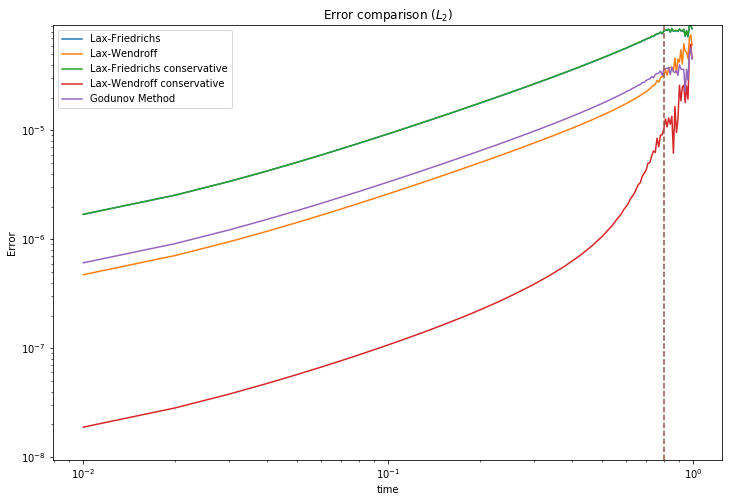

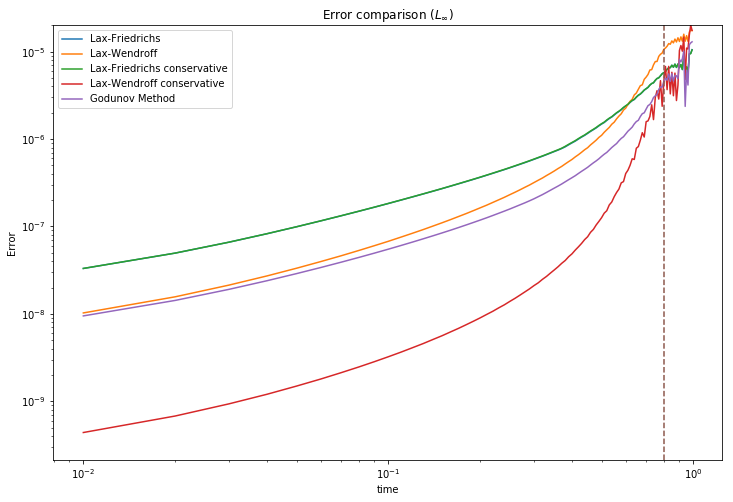

In [12]:
schemes = [LF, LW, LF_cons, LW_cons, Godunov]


def L2(a, b):
    """returns the L2 norm of the system"""
    return np.sum(np.sqrt((b - a)**2))*dx*dt

def L_inf(a, b):
    """returns the L infinity norm of the system"""
    return np.max(np.abs(b - a))*dx*dt

L2.str = r'$L_2$'
L_inf.str = r'$L_\infty$'

def check_collapse(x):
    """ Checks the 'collapse' of the Lagrangian solution. """
    # Collapse has happened as soon as two right neigbours have
    # lower x values than their left neighbours.
    count = np.sum(x - np.roll(x, 1) < 0)
    if count >1:
        return True
    return False
    
def compare(norm=L2, plot=True):
    """ Compares schemes to Lagrange using the given norm """
    if plot:
        #Set up figure
        plt.figure(figsize=(12, 8))
        plt.xlabel("time")
        plt.ylabel("Error")
        plt.title("Error comparison " + "(" + norm.str + ")")
    
    #Set up dictionaries and time variables.
    p_dict = {}
    p_dict[Lagrange] = variable(xL0)    
    diff_dict = {}
    time = np.arange(0, T, dt)
    t_collapse = 0
    
    for scheme in schemes:
        p_dict[scheme] = variable(p0)
        diff_dict[scheme] = []
    
    # Run the simulation
    for t in np.arange(0, T, dt):
        #Check for collapse.
        if check_collapse(p_dict[Lagrange].v) and t_collapse == 0:
            t_collapse = t
            if not plot:
                break
        #Update the Lagrange solution
        p_dict[Lagrange].update(Lagrange)
        
        #Interpolate the Lagrange solution to compare it to the 
        #others. Also update the p-vectors for the schemes. 
        for scheme in schemes:
            p_dict[scheme].update(scheme)
            interp = np.interp(x0, p_dict[Lagrange].v, pL, period=1)
            diff_dict[scheme].append(norm(interp, p_dict[scheme].v))
            
        
    
    #Maximum error value for collapse plotting.
    if plot:
        max_val = 0
        min_val = 10**30
        for scheme in schemes:
            plt.plot(time, diff_dict[scheme], label=scheme.str)
            if np.max(diff_dict[scheme]) > max_val:
                max_val = np.max(diff_dict[scheme])
            if np.min(diff_dict[scheme]) < min_val:
                min_val = np.min(diff_dict[scheme])
        #Plot collapse line
        if t_collapse != 0:
            plt.plot([t_collapse, t_collapse], [min_val,max_val], "--")
        plt.ylim(min_val, max_val)
        plt.legend()
        plt.ylim()
        plt.yscale('log')
        plt.xscale('log')
        plt.show()
    if not plot:
        return diff_dict
    


compare()
compare(L_inf)

#### <font color='navy'>Comment:</font>
The above figure shows the total cumulative error of every scheme when compared to the Lagrangian solution. The collapse time $t_c$ has been marked. Since the error is cumulative, errors for all schemes increase with time. 

Of all our schemes, the conservative Lax-Wendroff scheme seems to be the best solution to the WLR equation. It must be noted however, that this scheme strongly distorts the curve around the schock wave, compared to e.g. the Godunov scheme. This distortion can be seen in the different results for the $L_2$ and the $L_\infty$ norms. The latter measures the largest deviation at a single point, at which the Lax-Wendroff scheme performs poorly. 

The two Lax-Friedrich schemes are almost identical at our original parameters for $\Delta x$ and $\Delta t$ and are the worst overall, in accordance with their first order accuracy. The Godunov scheme, while being of the same order of accuracy, still performs better due to its more accurate approximation of the Riemann problem. 

### <font color='navy'> <u> Conclusions </u></font>

In this project we found out the numerical solutions to the LWR equation modelling traffic flow. The most essential feature i.e a shock which corressponds to a traffic jam was observed in all the solutions.

We compared different schemes and saw how finite volume conservative schemes are better than finite element non-conservative ones due to their conservative nature. We also saw that the schemes perform poorly after the formation of the shock and Gudonov method is the most stable near the time forming up to the shock. We discussed the accuracy order of our schemes and their truncation criteria. 